# MNIST Handwritten Digits Classification

In [1]:
# Standard imports
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from matplotlib import pyplot as plt

# Third-party imports
from losses import MSE
from layers import Dense
from network import Network
from activations import Tanh

In [2]:
def show_image(img: np.ndarray) -> None:
    """ Plots an image on grayscale """
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


def get_accuracy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """ Calculates the accuracy of the predictions """
    return (np.argmax(y_pred, axis = 1) == np.argmax(y_true, axis = 1)).sum() / len(y_true)


def subsample(x: np.ndarray, y: np.ndarray, n: int) -> tuple:
    """ Returns a subsample of the dataset """
    return x[:n], y[:n]

### Loading the Data

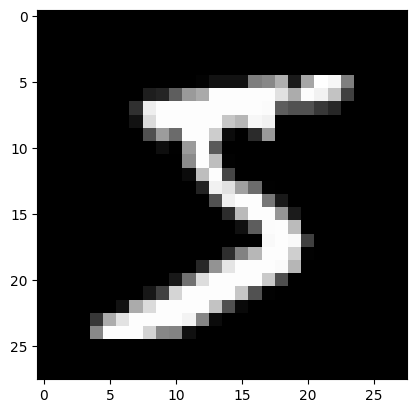

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
show_image(x_train[0])  # Show image example

In [4]:
def reshape_and_normalize_data(data: np.ndarray) -> np.ndarray:
    """ Reshapes and normalizes the data """
    data = data.reshape(data.shape[0], 1, 28 * 28)
    return data.astype('float32') / 255

# Reshape and normalize the data
x_train = reshape_and_normalize_data(x_train)
x_test = reshape_and_normalize_data(x_test)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

### Defining Model Architecture

In [5]:
network = Network()                                     # Initialize network
network.add(Dense(28 * 28, 16, activation = Tanh()))    # Hidden layer #1
network.add(Dense(16, 16, activation = Tanh()))         # Hidden layer #2
network.add(Dense(16, 10, activation = Tanh()))         # Output layer
network.compile(MSE())                                  # Compile network

### Prediction with no previous training

In [6]:
X, y_true = subsample(x_train, y_train, 100)    # Subsample the data
y_pred = network.predict(X)                     # Make predictions

# Calculate the accuracy
accuracy = get_accuracy(y_true, y_pred)
print(f'Accuracy: {round(accuracy * 100, 2)}%')

Accuracy: 13.0%


### Training the Model

In [7]:
# Hyperparameters
EPOCHS = 20
LEARNING_RATE = 1
BATCH_SIZE = 10

history = network.fit(
    X = X,
    y = y_true,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    learning_rate = LEARNING_RATE,
    verbose = True  # Display the loss after each epoch
)

Epoch 1/20	Error: 0.2960422997128823
Epoch 2/20	Error: 0.12875148337117018
Epoch 3/20	Error: 0.10752313816083635
Epoch 4/20	Error: 0.10272038900228612
Epoch 5/20	Error: 0.0948014921834661
Epoch 6/20	Error: 0.09630045020258823
Epoch 7/20	Error: 0.09312277843016031
Epoch 8/20	Error: 0.10028215560386872
Epoch 9/20	Error: 0.09191273841159114
Epoch 10/20	Error: 0.08932378429170892
Epoch 11/20	Error: 0.09210462081734505
Epoch 12/20	Error: 0.08782022249113382
Epoch 13/20	Error: 0.08551803664012858
Epoch 14/20	Error: 0.08164751556537139
Epoch 15/20	Error: 0.08207140962617383
Epoch 16/20	Error: 0.08497027039914588
Epoch 17/20	Error: 0.07760739999125738
Epoch 18/20	Error: 0.08289541445264793
Epoch 19/20	Error: 0.08677380430739243
Epoch 20/20	Error: 0.08899539606809735


In [8]:
X, y_true = subsample(x_train, y_train, 100)    # Subsample the data
y_pred = network.predict(X)                     # Make predictions

# Calculate the accuracy
accuracy = get_accuracy(y_true, y_pred)
print(f'Accuracy: {round(accuracy * 100, 2)}%')

Accuracy: 67.0%


### Plotting the Performance

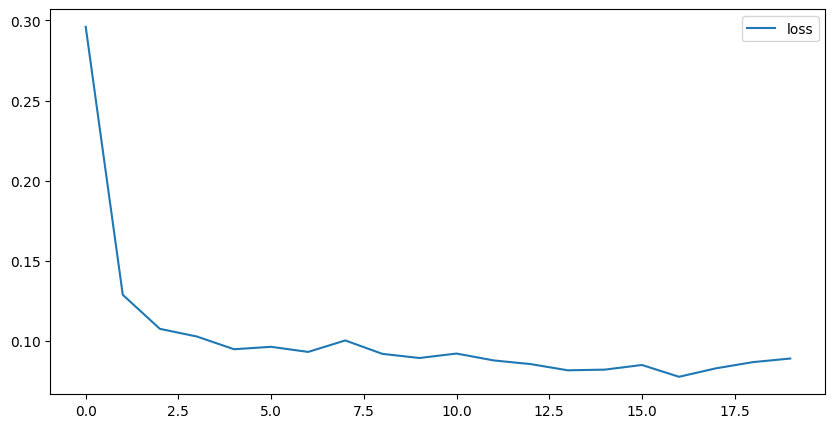

In [9]:
plt.figure(figsize = (10, 5))
plt.plot(range(EPOCHS), history, label = 'loss')
plt.legend()
plt.show()